In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from dnn_play.classifiers.neural_net import NeuralNet, neural_net_loss, rel_err_gradients

from dnn_play.utils.data_utils import load_mnist
from dnn_play.utils.visualize_utils import display_network

# Plot settings
plt.rcParams['figure.figsize'] = (10.0, 10.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'

In [2]:
# Load MNIST data
(X_train, y_train), (X_val, y_val), (X_test, y_test) = load_mnist()
#(X_train, y_train), (X_val, y_val), (X_test, y_test) = load_mnist(n_train=5500, n_val=500, n_test=1000)

print("X_train shape = {} y_train shape = {}".format(X_train.shape, y_train.shape))
print("X_val   shape = {} y_val  shape = {}".format(X_val.shape, y_val.shape))
print("X_test  shape = {} y_test shape = {}".format(X_test.shape, y_test.shape))

X_train shape = (55000, 784) y_train shape = (55000,)
X_val   shape = (5000, 784) y_val  shape = (5000,)
X_test  shape = (10000, 784) y_test shape = (10000,)


In [3]:
# Number of layer units
input_size  = X_train.shape[1] # Dimension of features
hidden_size = 28
n_classes = np.max(y_train) + 1

layer_units = ((input_size, hidden_size, n_classes))

# Hyperparameters
reg = 1e-4 # Regulation, weight decay

# Numerical parameters
max_iters = 400

# Initialize weights
clf = NeuralNet(layer_units)
weights = clf.init_weights()
loss, grad = neural_net_loss(weights, X_train, y_train, reg)

print('loss: %f' % loss)


loss: 1.249988


In [4]:
# Gradient checking
if rel_err_gradients() < 1e-8:
    print("Gradient check passed!")
else:
    print("Gradient check failed!") 

Gradient check passed!


In [5]:
"""
Training
"""
weights, loss_history, train_acc_history, val_acc_history = clf.fit(X_train, y_train, X_val, y_val, 
                                                                    reg=reg, max_iters=max_iters, verbose=True)
    

iter:   20, loss: 0.414114, train_acc: 0.302182, val_acc: 0.309200
iter:   40, loss: 0.229197, train_acc: 0.701073, val_acc: 0.719000
iter:   60, loss: 0.140759, train_acc: 0.837418, val_acc: 0.857400
iter:   80, loss: 0.122732, train_acc: 0.856491, val_acc: 0.869800
iter:  100, loss: 0.091045, train_acc: 0.929273, val_acc: 0.943400
iter:  120, loss: 0.082602, train_acc: 0.943836, val_acc: 0.958600
iter:  140, loss: 0.079479, train_acc: 0.951091, val_acc: 0.961800
iter:  160, loss: 0.077801, train_acc: 0.954618, val_acc: 0.962400
iter:  180, loss: 0.076804, train_acc: 0.956982, val_acc: 0.964800
iter:  200, loss: 0.075982, train_acc: 0.958327, val_acc: 0.966200
iter:  220, loss: 0.075257, train_acc: 0.959127, val_acc: 0.967600
iter:  240, loss: 0.074697, train_acc: 0.959564, val_acc: 0.968600
iter:  260, loss: 0.074332, train_acc: 0.959691, val_acc: 0.969200
iter:  280, loss: 0.074039, train_acc: 0.960055, val_acc: 0.969400
iter:  300, loss: 0.073792, train_acc: 0.960582, val_acc: 0.96

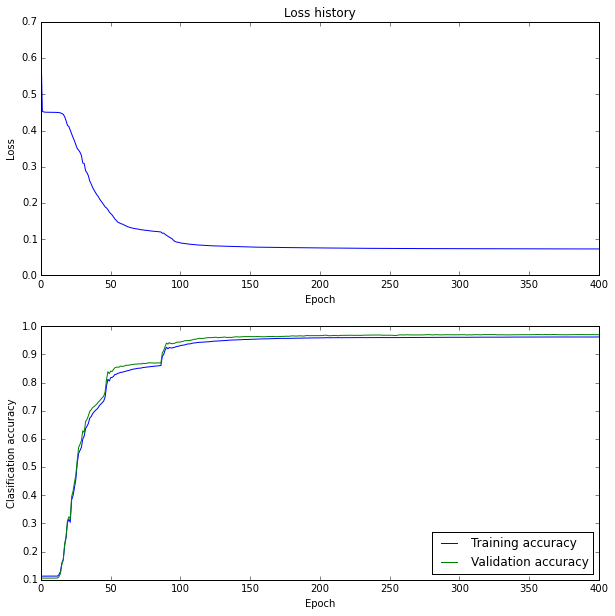

In [6]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(loss_history)
plt.title('Loss history')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(train_acc_history)
plt.plot(val_acc_history)
plt.legend(['Training accuracy', 'Validation accuracy'], loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')

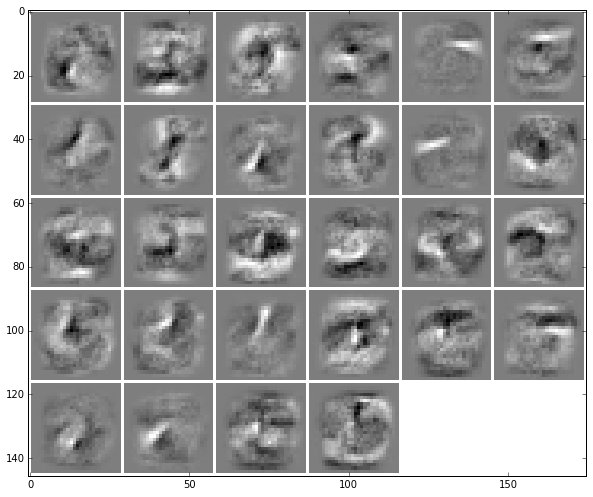

In [7]:
# Visualize the weights 

W0 = weights[0]['W']
image = display_network(W0)
plt.imshow(image, cmap = plt.cm.gray)

In [8]:
# Make predictions
pred = clf.predict(X_test)
acc = np.mean(y_test == pred)

print("Accuracy: {:5.2f}% \n".format(acc*100))


Accuracy: 95.79% 



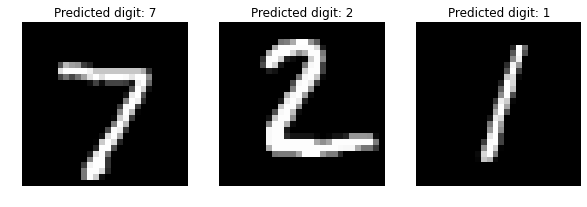

In [9]:
# View some images and predictions
n_images = 3
images = X_test[:n_images].reshape((n_images, 28, 28))
pred = clf.predict(X_test[:n_images])

for i in range(n_images):
    plt.subplot(1, n_images, i+1)
    plt.imshow(images[i], cmap = plt.cm.gray)
    plt.title('Predicted digit: {}'.format(pred[i]))
    plt.axis('off')

    